# Azúcar y Sociedad

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [3]:
random.seed(10)

### Temas

- Agentes

### Wikipedia

All Sugarscape models include the agents (inhabitants), the environment (a two-dimensional grid) and the rules governing the interaction of the agents with each other and the environment.

The original model presented by J. Epstein & R. Axtell (considered as the first large scale agent model) is based on a 51x51 cell grid, where every cell can contain different amounts of sugar (or spice). In every step agents look around, find the closest cell filled with sugar, move and metabolize. They can leave pollution, die, reproduce, inherit sources, transfer information, trade or borrow sugar, generate immunity or transmit diseases - depending on the specific scenario and variables defined at the set-up of the model.

## Introducción

[**Sugarscape**](http://en.wikipedia.org/wiki/Sugarscape) es un modelo basado en agentes desarrollado por **Joshua M. Epstein** y **Robert Axtell**, presentado originalmente en _Growing Artificial Societies_. Consta de una rejilla 2D, en la que hay un bien abstracto, llamado `azucar`, los agentes vagan por la rejilla y acumulan `azúcar`.

El modelo original es el primer modelo de agentes a gran escala y ocurría en una rejilla de $51 \times 51$ celdas. En cada `step` los agentes miran alredor, encuentran la celda más cercana con `azúcar`, se mueven y metabolizan (tasa a la que consumen `azúcar`). La simulación puede ser complicada y se puede agregar que cada agente deje contaminación, se reproduzca, herede recursos, transfiera información, comercie, regale, transmita enfermedades, o haga la guerra. También es posible agregar un Gobierno que cobre impuestos cada determinado número de `steps` o que inclusive haya dos tipos de bien (en las simulaciones se llama `especia`).

## Preguntas a responder

- Cree un clase `Habitante` que herede de nuestra clase `Agente`, implemente el algoritmo de comportamiento comentado en la introducción. 
- Cree un clase `Sugarscape` que herede de nuestra clase `Mundo`. Representa mediante grados de color la fuerza del agente y la cantidad de azúcar en la celda.
- Cree una clase `Bien` que represente al `azúcar` de **Sugarscape**.
- Ejecuta una simulación sencilla, con agentes consumiendo recursos y acaparándolos. Inicializa los agentes con diferentes capacidades de almacenar azúcar, consumo de azúcar (metabolismo) y rango de visión.
- Grafica la [**curva de Lorenz**](http://en.wikipedia.org/wiki/Lorenz_curve) y el [**coeficiente de Gini**](http://en.wikipedia.org/wiki/Gini_coefficient), grafica también la población y la cantidad de azúcar. ¿Qué interpretación le das a las gráficas?
- Agrega un factor de regeneración del `azúcar`.
- Agrega un factor de reproducción asexual. (Si tiene suficiente energía, se divide en dos).
- Agrega que el agente muera por hambre.
- Agrega la `especia` al modelo, también es necesario para vivir. Su valor nutrimental es diferente al del `azúcar`.
- Agrega la habilidad de comerciar.
- Agrega una `tribu` al agente. 
- Agrega el comportamiento de que nuevos agentes sean creados cuando un agente muera.
- Agrega un tiempo de vida máximo.
- Agrega una variable `sexo`.
- Agrega reproducción sexual (Si está en su edad fértil, ambos tienen energía y le transmiten la mitad a su hijo).

In [22]:
class Habitante:
    """ Agente general """
    def __init__(self, tipo, locacion = np.array([0,0])):
        self.tipo = tipo
        self.locacion = locacion
        self.siguiente_accion = None

    def distancia(self, otro):
        "Calcula la distancia euclídea entre este agente y otro."
        return np.linalg.norm(self.locacion - otro.locacion)  # Otra manera es usar np.sqrt(np.sum((a-b)**2))
    
    def vecinos(self, agentes):
        pass
    
    def actuar(self, agentes):
        self.locacion =  self.siguiente_accion
        
    def decidir(self, agentes):
        self.siguiente_accion = np.array([random.uniform(0, 51), random.uniform(0, 51)]) # Toma una nueva posición al azar
    
    def actualizar(self, agentes):
        self.decidir(agentes)
        self.actuar(agentes)

In [23]:
class Sugarscape:
    def __init__(self, agentes, ancho = 5, alto = 5, steps = 10):
        self.agentes = agentes
        self.ancho = ancho
        self.alto = alto
        self.steps = steps
        self.init_anim()
        
        print ("Creado el mundo")
        
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 51), ylim=(0, 51))
        plot_args = {'markersize' : 8, 'alpha' : .6}
        self.puntos, = self.ax.plot([], [], 'o', **plot_args)
       
       
    def dibujar(self, step):
        x_values_0, y_values_0 = [], []
        for agente in self.agentes:
            x, y = agente.locacion
            x_values_0.append(x)
            y_values_0.append(y)

        self.puntos.set_data(x_values_0, y_values_0)
        
        self.ax.set_title('Paso {}'.format(step))
        
        return self.puntos,
       
    def actualizar(self, step):   
        self.dibujar(step) # Dibuja el mundo
        
        for agente in self.agentes:
            agente.actualizar(self.agentes)
    
    def clean_screen(self):
        self.puntos.set_data([], [])
        return self.puntos,
          
    def simular(self):
        anim = animation.FuncAnimation(self.fig, self.actualizar, init_func=self.clean_screen, frames=self.steps, interval=1000, blit=False)
        return anim


In [28]:
import random
from itertools import product

class Agent:
    '''
    classdocs
    '''
    costForMatingRange = 0,0 #10,40
    tagsProbability = 0.55
    
    def __init__(self, env, x = 0, y = 0, metabolism = 4, vision = 6, endowment = 25, maxAge = 100, sexe = 0, fertility = (12,50), tags = (0, 11)):
        '''
        Constructor
        '''
        self.env = env
        self.x = x
        self.y = y
        self.metabolism = metabolism
        self.vision = vision
        self.maxAge = maxAge
        self.age = 0
        self.sexe = sexe
        self.fertility = fertility
        self.setInitialEndowment(endowment)
        self.setTags(tags)

    ''' 
    get / set section 
    '''
    def getEnv(self):
        return self.env
    
    def setLocation(self,x, y):
        self.x = x
        self.y = y

    def getLocation(self):
        return (self.x, self.y)
    
    def setMetabolism(self, metabolism):
        self.metabolism = metabolism
        
    def getMetabolism(self):
        return self.metabolism

    def setVision(self, vision):
        self.vision = vision
        
    def getVision(self):
        return self.vision

    def setInitialEndowment(self, endowment):
        self.endowment = endowment
        self.sugar = endowment
        if self.costForMatingRange == (0,0):
            self.costForMating = endowment
        else:
            self.costForMating = random.randint(self.costForMatingRange[0], self.costForMatingRange[1])
        
    def getSugar(self):
        return self.sugar

    def setAge(self, maxAge):
        self.maxAge = maxAge
        self.age = 0
        
    def getAge(self):
        return self.age
    
    def setSexe(self, sexe):
        self.sexe = sexe
        
    def getSexe(self):
        return self.sexe
    
    def setFertility(self, fertility):
        self.fertility = fertility
        
    def setTags(self, tags, tagsLength):
        self.tags = tags
        self.tagsLength = tagsLength
        self.tribe = round(float(bin(tags).count('1')) / float(tagsLength))
    
    def getTags(self):
        return self.tags

    def getTagsLength(self):
        return self.tagsLength
    
    def getTribe(self):
        return self.tribe

    ''' 
    build common lists
    '''

    # build a list of available food locations
    def getFood(self):
        food = [(x, self.y) for x in range(self.x - self.vision, self.x + self.vision + 2)
                if self.env.isLocationValid((x, self.y)) 
                and self.env.isLocationFree((x, self.y))]

        food.extend([(self.x, y) for y in range (self.y - self.vision, self.y + self.vision + 2) 
                if self.env.isLocationValid((self.x, y)) 
                and self.env.isLocationFree((self.x, y))])
        return food
    
    # build a list of possible neighbours for in neighbourhood
    def getNeighbourhood(self):
        neighbourhood = [self.env.getAgent((x,self.y)) for x in range(self.x - 1, self.x + 2)
                         if self.env.isLocationValid((x, self.y)) 
                         and not self.env.isLocationFree((x, self.y))
                         and x != self.x]
        
        neighbourhood.extend([self.env.getAgent((self.x,y)) for y in range(self.y - 1, self.y + 2)
                         if self.env.isLocationValid((self.x, y)) 
                         and not self.env.isLocationFree((self.x, y))
                         and y != self.y])
        return neighbourhood

    # build a list of possible preys around
    def getPreys(self):
        preys = [self.env.getAgent((x, self.y)) for x in range(self.x - self.vision, self.x + self.vision + 2)
                if self.env.isLocationValid((x, self.y)) 
                and not self.env.isLocationFree((x, self.y))
                and self.sugar > self.env.getAgent((x, self.y)).getSugar()
                and self.env.getAgent((x, self.y)).getTribe() != self.tribe]

        preys.extend([self.env.getAgent((self.x, y)) for y in range(self.y - self.vision, self.y + self.vision + 2)
                if self.env.isLocationValid((self.x, y)) 
                and not self.env.isLocationFree((self.x, y))
                and self.sugar > self.env.getAgent((self.x, y)).getSugar()
                and self.env.getAgent((self.x, y)).getTribe() != self.tribe])
        return preys
    
    ''' 
    rules
    '''

    # TRANSMIT
    def transmit(self):
        # build a list of possible neighbours for in neighbourhood
        neighbourhood = self.getNeighbourhood()

        # tag-flipping with neighbours
        for neighbour in neighbourhood:
            mask = 1 << random.randint(0, self.tagsLength - 1)
            neighbourTags = neighbour.getTags()
            if  (self.tags & mask) != (neighbourTags & mask):
                # flip neighbour's tag
                neighbourTags ^= mask
                # transmit new tag
                neighbour.setTags((neighbourTags, self.tagsLength))

    # AGEING
    # If age > maxAge Then the agent is dead (return False)
    def incAge(self):
        self.age += 1
        return (max(self.maxAge - self.age, 0))
    
    # FERTILITY
    # First, to have offspring, agents must be of childbearing age. 
    # Second, children born with literally no initial endowment of sugar would instantly die. 
    # We therefore require that parents give their children some initial endowment.
    # Each newborn's endowment is the sum of the (usually unequal) contributions of mother and father.
    # Dad contributes an amount equal to one half of whatever his initial endowment had been, and likewise for mom.
    # To be parents, agents must have amassed at least the amount of sugar which they were endowed at birth.
    def isFertile(self):
        return (self.age >= self.fertility[0] and self.age <= self.fertility[1] and self.sugar >= self.costForMating)

    # MATE (Generator):
    # Select a neighboring agent at random.
    # If the neighbor is fertile and of the opposite sex and at least one of the agent has an empty neighboring site, then a child is born
    # Repeat for all neighbors.
    def mate(self):
        # build a list of possible partners in neighbourhood
        neighbourhood = self.getNeighbourhood()
        
        # randomize
        random.shuffle(neighbourhood)
        
        # mate with (all) possible partners
        for neighbour in neighbourhood:
            # partner selection
            if neighbour.getSexe() == self.sexe or not neighbour.isFertile():
                continue
            # find a free location around the agent for the baby 
            freeLocation = self.findFreeLocationAround(self.x, self.y)
            if not freeLocation:
                # or find around the partner
                freeLocation = self.findFreeLocationAround(neighbour.x, neighbour.y)
            # then, give birth if a location has been found
            if freeLocation:
                yield self.createChild(neighbour, freeLocation)

    # Find a free location around x,y (for baby)
    def findFreeLocationAround(self, x, y):
        '''locations = [(i, j) for i,j in product(range(x - 1, x + 2), range(y - 1, y + 2))
                     if self.env.isLocationValid((i, j)) 
                     and self.env.isLocationFree((i, j))]'''
        locations = [(i, y) for i in range(x - 1, x + 2) if self.env.isLocationValid((i, y)) and self.env.isLocationFree((i, y))]
        locations.extend([(x, j) for j in range(y - 1, y + 2) if self.env.isLocationValid((x, j)) and self.env.isLocationFree((x, j))])
        length = len(locations)
        if length:
            return locations[random.randint(0, length - 1)]
        return None
    
    # Cross-over offspring from two parents: parent1 and parent2
    def createChild(self, parent, x, y):
        # cross-over parents genetics
        genitors = [self, parent]
        metabolism = genitors[random.randint(0,1)].metabolism
        vision = genitors[random.randint(0,1)].vision
        endowment = 0.5 * (genitors[0].endowment + genitors[1].endowment)
        genitors[0].sugar = max(genitors[0].sugar - 0.5 * genitors[0].endowment, 0)
        genitors[1].sugar = max(genitors[1].sugar - 0.5 * genitors[1].endowment, 0)
        ageMax = genitors[random.randint(0,1)].maxAge
        sexe = random.randint(0,1)
        fertility = genitors[random.randint(0,1)].fertility
        
        # build cultural tags from parents genetics
        mask = 1
        childTags = 0
        for tag in range(self.tagsLength):
            tag1 = self.tags & mask
            tag2 = parent.getTags() & mask
            if tag1 == tag2 or random.random() < self.tagsProbability:
                childTags |= tag1
            else:
                childTags |= tag2
            mask <<= 1
 
        # create child agent
        child = Agent(self.env, x, y, metabolism, vision, endowment, ageMax, sexe, fertility, (childTags, self.tagsLength))
        self.env.setAgent((x, y), child)
        return child

                
    # MOVE:
    # Look out as far as vision permits in the four principal lattice directions and identify the unoccupied site(s) having the most sugar.
    # If the greatest sugar value appears on multiple sites then select the nearest one.
    # Move to this site.
    # Collect all the sugar at this new position.
    # Increment the agent's accumulated sugar wealth by the sugar collected and decrement by the agent's metabolic rate.

    def move(self):
        # build a list of available food locations
        food = self.getFood()

        # randomize food locations
        random.shuffle(food)

        # find best food location
        # much faster than sorting.
        move = False
        newx = self.x
        newy = self.y
        best = self.env.getCapacity((self.x, self.y))
        minDistance = 0
        for (x,y) in food:
            capacity = self.env.getCapacity((x, y))
            distance = abs(x - self.x + y - self.y) # Manhattan distance enough due to no diagonal
            if capacity > best or (capacity == best and distance < minDistance):
                best = capacity
                minDistance = distance
                move = True
                newx = x
                newy = y

        # move to new location if any
        if move:
            self.env.setAgent((self.x, self.y), None)
            self.env.setAgent((newx, newy), self)
            self.x = newx
            self.y = newy
            
        # collect, eat and consume
        self.sugar = max(self.sugar + best - self.metabolism, 0)
        self.env.setCapacity((self.x, self.y), 0)

    '''
    # sort implementation
    # (for the record: actually was slower so not used)
    def compareLocations(self, (x1, y1), (x2, y2)):
        c1 = self.env.getCapacity((x1, y1))
        c2 = self.env.getCapacity((x2, y2))
        if c1 - c2:
            # bigger is better
            return cmp(c1, c2)
        else:
            # Manhattan distance enough due to no diagonal
            d1 = abs(x1 - self.x + y1 - self.y)
            d2 = abs(x2 - self.x + y2 - self.y)
            # shorter is better
            return cmp(d2, d1)
    
    def moveSort(self):
        # build a list of available food locations
        food = getFood()
        
        # randomize food locations
        random.shuffle(food)
        if len(food):
            # add existing location (self.x, self.y) => currently not in food
            food.extend([(self.x, self.y)])
            # randomize food locations
            random.shuffle(food)
            # sort by capacity and distance
            food.sort(cmp = self.compareLocations, reverse = True)
            # move to best location
            (newx, newy) = food[0]
            self.env.setAgent((self.x, self.y), None)
            self.env.setAgent((newx, newy), self)
            self.x = newx
            self.y = newy
            # collect, eat and consume
            self.sugar = max(self.sugar + self.env.getCapacity(self.x, self.y) - self.metabolism, 0)
            self.env.setCapacity((self.x, self.y), 0)'''
        
    # COMBAT
    def combat(self, alpha):
        # build a list of available unoccupied food locations
        food = self.getFood()
        
        # build a list of potential preys
        preys = self.getPreys()
        
        # append to food safe preys (retaliation condition)
        C0 = self.sugar - self.metabolism
        food.extend([preyA.getLocation() for preyA, preyB in product(preys, preys)
                     if preyA != preyB 
                     and preyB.getSugar() < (C0 + self.env.getCapacity(preyA.getLocation()) + min(alpha, preyA.getSugar()))])
        
        # randomize food locations
        random.shuffle(food)

        # find best food location
        move = False
        newx = self.x
        newy = self.y
        best = self.env.getCapacity((self.x, self.y))
        minDistance = 0
        for (x,y) in food:
            capacity = self.env.getCapacity((x, y))
            agent = self.env.getAgent((x, y))
            if agent :
                capacity += min(alpha, agent.getSugar())
            distance = abs(x - self.x + y - self.y) # Manhattan distance enough due to no diagonal
            if capacity > best or (capacity == best and distance < minDistance):
                best = capacity
                minDistance = distance
                move = True
                newx = x
                newy = y

        # move to new location if any, and kill if occupied
        killed = None
        if move:
            killed = self.env.getAgent((newx, newy))
            self.env.setAgent((self.x, self.y), None)
            self.env.setAgent((newx, newy), self)
            self.x = newx
            self.y = newy
            
        # collect, eat and consume
        self.sugar = max(self.sugar + best - self.metabolism, 0)
        self.env.setCapacity((self.x, self.y), 0)
        return killed

Creado el mundo


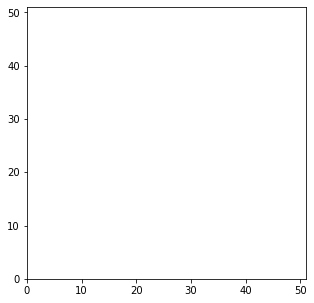

In [24]:
num_agentes = 10

agentes_simples = [Habitante(tipo = 2) for i in range(num_agentes)]


sin_chiste = Sugarscape(agentes = agentes_simples, steps = 10)


simulacion = sin_chiste.simular()

In [25]:
HTML(simulacion.to_html5_video())

## Preguntas adicionales

- ¿Qué pasa si la variable `tribu` afecta el comercio y el sexo? ¿Cómo lo simularías y por qué?
- ¿Cómo simularías **guerra primitiva**?
- ¿Cómo simularías **enfermedad**?
- ¿Quieres incluir **genética**? 
    - Define una cadena binaria (i.e. de ceros y unos) en los que se estén codificadas el sexo, capacidad de almacenar azúcar, metabolismo, rango de visión.
    - Cuando los agentes se reproduzcan sexualmente, realiza un [`crossover`](http://en.wikipedia.org/wiki/Crossover_(genetic_algorithm)) para determinar los atributos de los agentes de la siguiente generación.
- Agrega una asimetría de sexo, esto lo puedes modelar con un `offspring_cost` que sea mayor para uno de los sexos. Entonces antes de reproducirse sexualmente, hay una decisión por parte de los agentes.

## Bibliografía

- **Epstein, Joshua M.; Axtell, Robert** (October 11, 1996). _Growing artificial societies: social science from the bottom up_. `Brookings Institution Press. p. 224. ISBN 978-0-262-55025-3.`
- **Wikipedia** [_Sugarscape_](http://en.wikipedia.org/wiki/Sugarscape)